In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from getdist import plots, MCSamples, loadMCSamples
import getdist
import pickle as pkl

######################################################
#  Setting up plots
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'serif'}
axislabelfontsize='large'
mpl.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams['text.usetex']=True

base_dirname = "/Users/gabe/projects/recombination/data/chains/"
modrec_dirname = os.path.join(base_dirname, "modrec/chains")
lcdm_dirname = os.path.join(base_dirname, "lcdm_ref/chains")

s_modrec = loadMCSamples(os.path.join(modrec_dirname, "modrec"), settings={'ignore_rows': 0.5})
s_modrec_class = loadMCSamples(os.path.join(modrec_dirname, "modrec.post.CLASS"))
s_lcdm = loadMCSamples(os.path.join(lcdm_dirname, "lcdm_ref"))

## Paper plots

### Default plot settings

In [3]:
default_settings = plots.GetDistPlotSettings()
default_settings.axes_labelsize = 12
default_settings.fig_width_inch = 6
default_settings.linewidth = 2
default_settings.legend_fontsize = 12
default_settings.solid_colors = ["#7570b3", "#d95f02", "#1b9e77"]

### Reweighting comparison

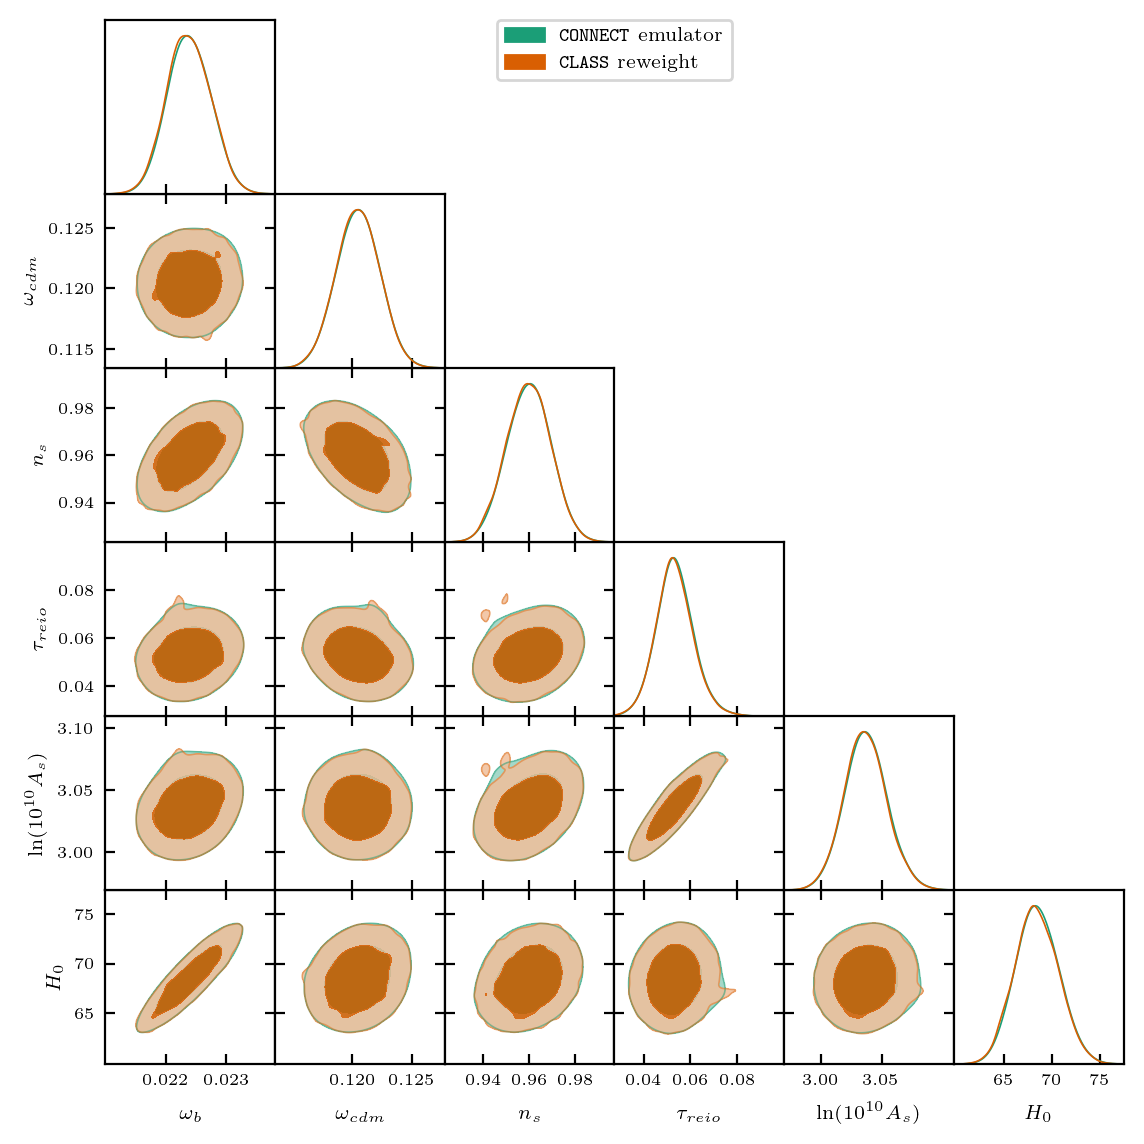

In [6]:
g = plots.get_subplot_plotter()
g.settings = default_settings
g.settings.solid_colors = ["#d95f02", "#1b9e77", "#7570b3"]
#g.settings.solid_colors = ["#1b9e77"]
g.triangle_plot([s_modrec, s_modrec_class], legend_labels=["$\\texttt{CONNECT}$ emulator", "$\\texttt{CLASS}$ reweight"], params=['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'logA', 'H0'], filled=True)
#g.triangle_plot([s_modrec], legend_labels=["$\\texttt{CONNECT}$ emulator"], params=['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'logA', 'H0'], filled=True)
#g.export("../results/triangle_plot_reweight.pdf")

### LCDM comparison

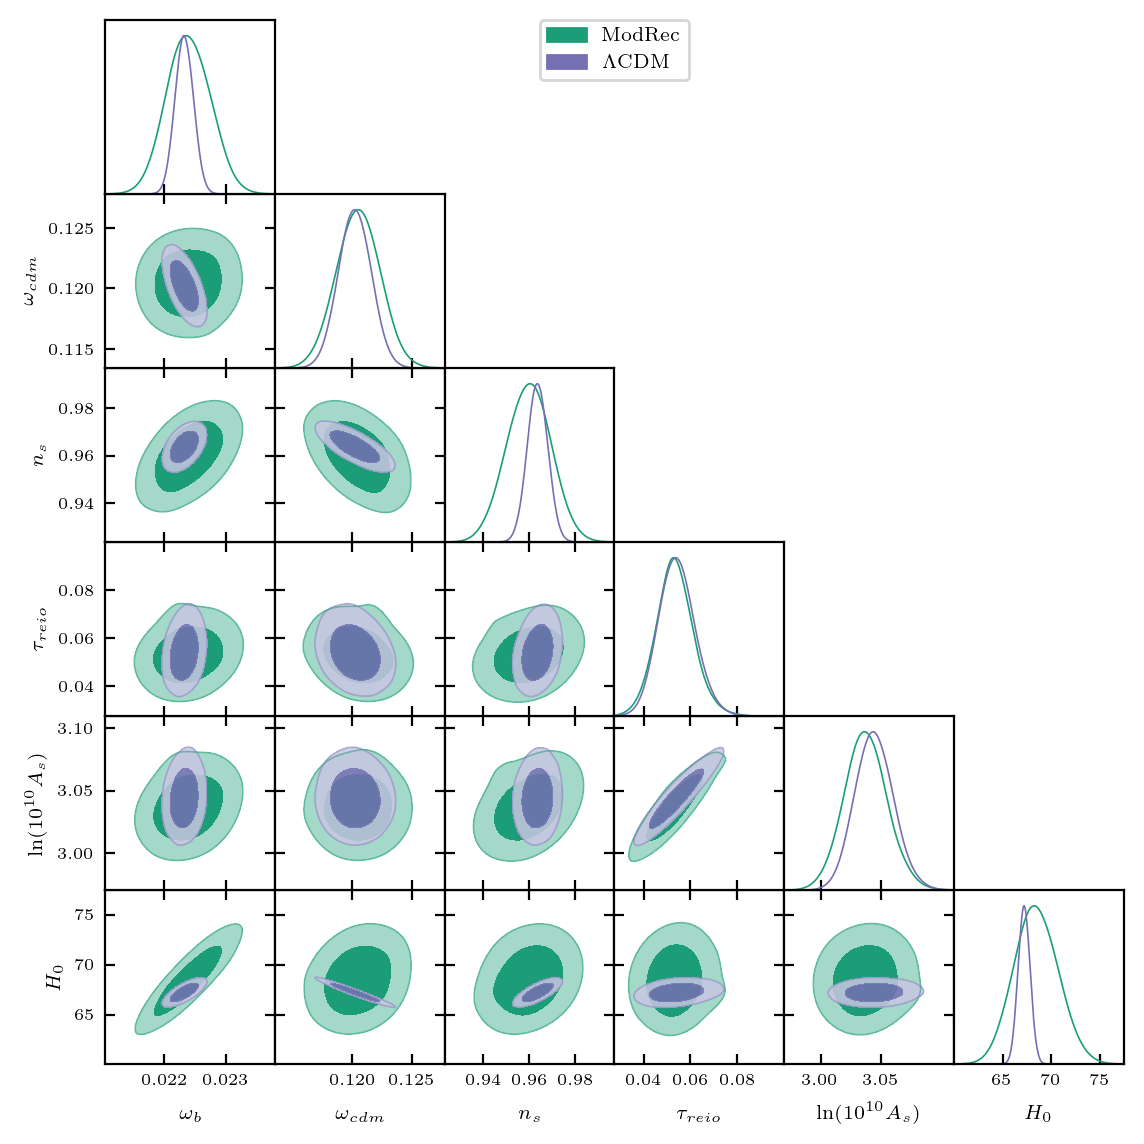

In [7]:
g = plots.get_subplot_plotter()
g.settings = default_settings
g.settings.solid_colors = ["#7570b3", "#1b9e77"]
g.triangle_plot([s_modrec, s_lcdm], legend_labels=["ModRec", "$\Lambda$CDM"], params=['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'logA', 'H0'], filled=True)
#g.export("../results/triangle_plot_lcdm.pdf")

### Control point triangle

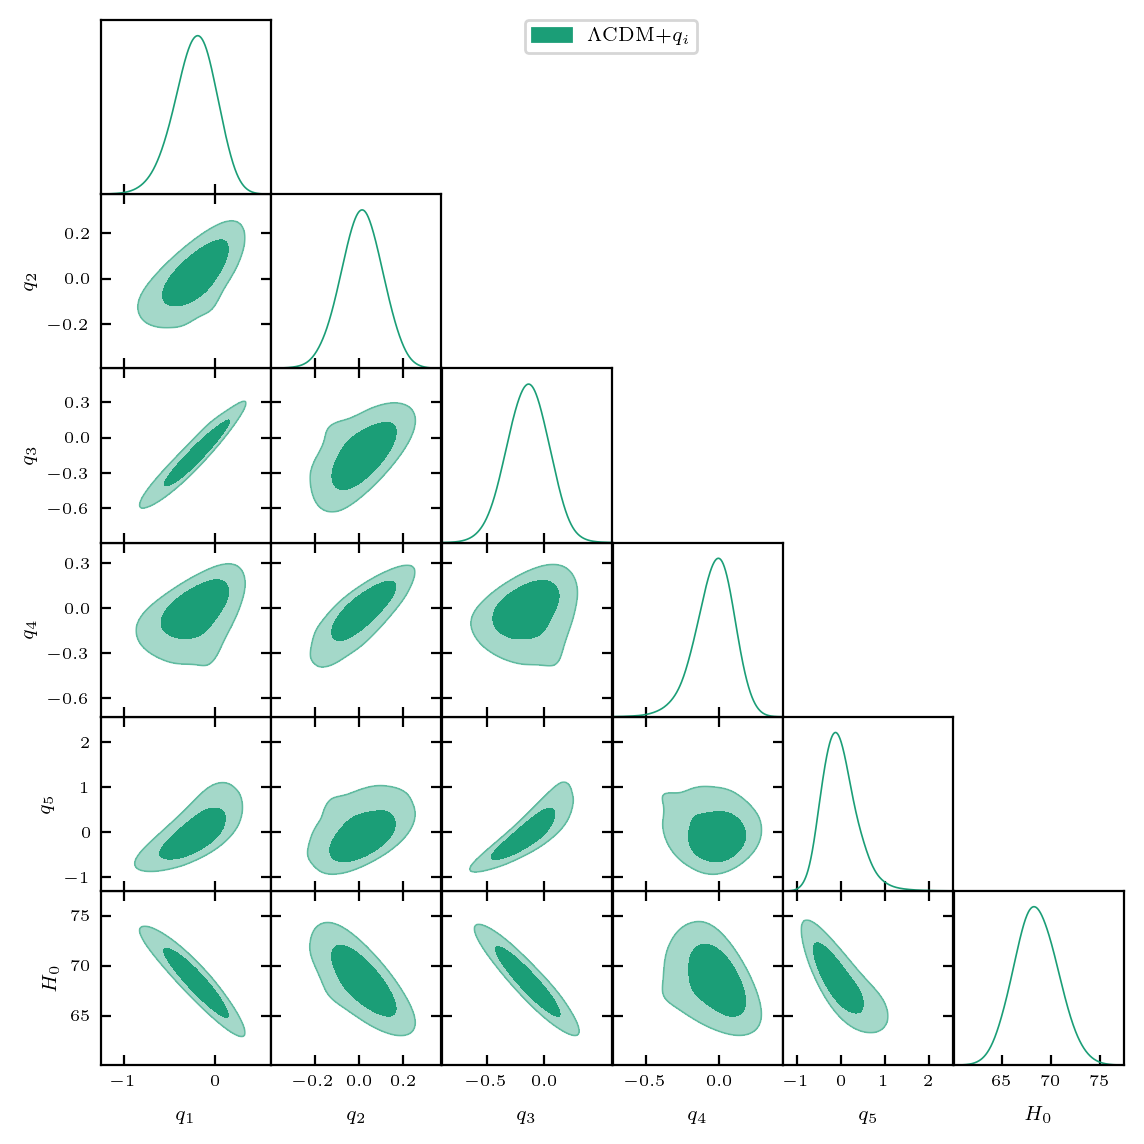

In [8]:
g = plots.get_subplot_plotter()
g.settings = default_settings
g.settings.solid_colors = ["#1b9e77"]
g.triangle_plot([s_modrec], legend_labels=["$\Lambda$CDM$+q_i$"], params=["q_1", "q_2", "q_3", "q_4", "q_5", "H0"], filled=True)
#g.export("../results/triangle_plot_qi.pdf")

### Combined

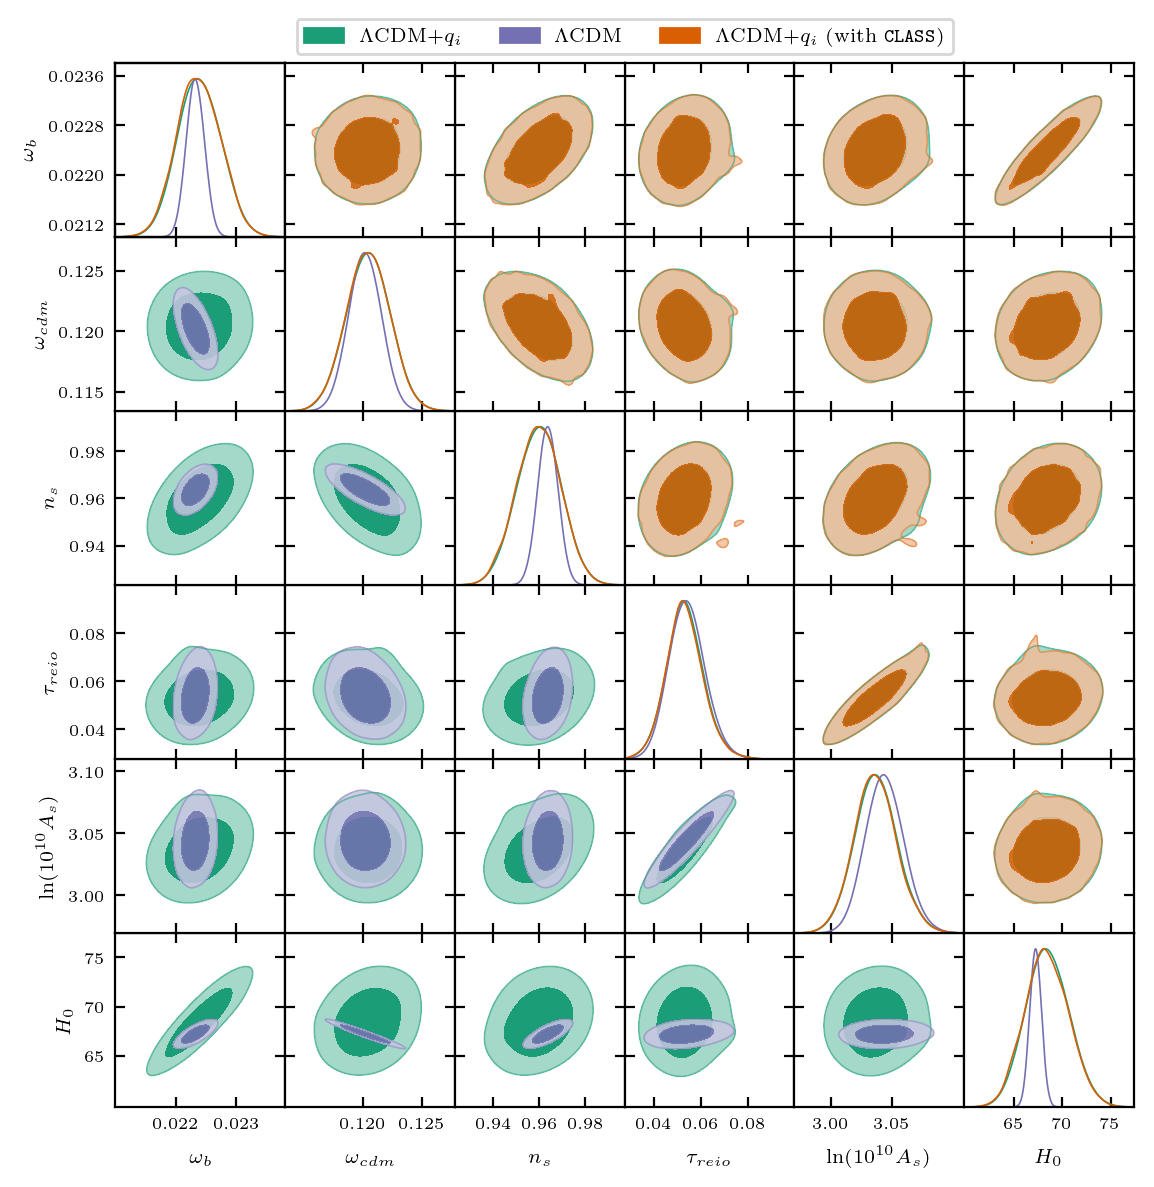

In [9]:
g = plots.get_subplot_plotter()
g.settings = default_settings
#g.settings.solid_colors = ["#7570b3", "#1b9e77", "#d95f02", "#1b9e77"]
#g.settings.solid_colors = ["red", "blue", "green"]

g.triangle_plot(roots=[s_modrec, s_lcdm], upper_roots=[s_modrec, s_modrec_class], contour_colors=["#1b9e77", "#7570b3"], upper_kwargs={"contour_colors":  ["#1b9e77","#d95f02"]}, diag1d_kwargs={"linewidth": 2}, legend_labels=["$\Lambda$CDM$+q_i$", "$\Lambda$CDM", "$\Lambda$CDM$+q_i$ (with $\\texttt{CLASS}$)"], params=['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'logA', 'H0'], filled=True)
#g.export("../results/triangle_plot_combined.pdf")

## Stats for tables

In [10]:
latex_limits = s_modrec.getLatex(params=["H0", "q_1", "q_2", "q_3", "q_4", "q_5"])

In [11]:
for i in np.arange(5):
    print("{} & {} & --\\\\".format(latex_limits[0][i], latex_limits[1][i]))

H_0 & 68.5\pm 2.3 & --\\
q_1 & -0.22^{+0.25}_{-0.21} & --\\
q_2 & 0.012\pm 0.096 & --\\
q_3 & -0.14\pm 0.19 & --\\
q_4 & -0.03^{+0.15}_{-0.11} & --\\


67.36


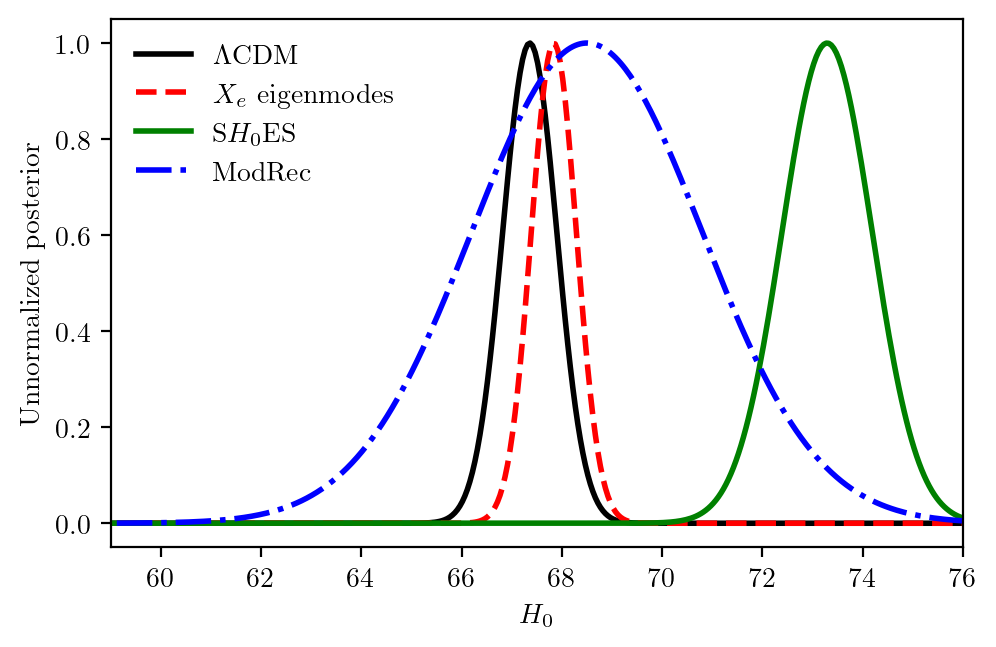

In [8]:

h_range = np.linspace(50,100,1000)

h_constraints = {"P18": [67.36, .54],
                 "P18-modrec": [67.84, .45],
                 "modrec": [68.5, 2.3]}

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 10,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

fig,ax = plt.subplots() 
fig.set_size_inches(w=5.5, h=3.43)

def gaussian(x, mu, sig):
    return np.exp(-0.5*(x-mu)**2/(sig**2))

print(h_constraints["P18"][0])
ax.plot(h_range, gaussian(h_range, mu=h_constraints["P18"][0], sig=h_constraints["P18"][1]), color="black", linewidth=2,  label="$\Lambda$CDM")
ax.plot(h_range, gaussian(h_range, mu=h_constraints["P18-modrec"][0], sig=h_constraints["P18-modrec"][1]), color="red", linestyle="dashed",  linewidth=2, label="$X_e$ eigenmodes")
ax.plot(h_range, gaussian(h_range, mu=73.29, sig=0.9), color="green",  linewidth=2, label="S$H_0$ES")
ax.plot(h_range, gaussian(h_range, mu=h_constraints["modrec"][0], sig=h_constraints["modrec"][1]), color="blue", linestyle="dashdot",  linewidth=2, label="ModRec")
ax.set_xlim([59,76])
ax.set_xlabel("$H_0$")
ax.set_ylabel("Unnormalized posterior")
ax.legend(frameon=False, loc="upper left")
plt.savefig("../results/H0_comparison_modrec.pdf", dpi=300, bbox_inches="tight")
plt.show()